**Exploratory Data Analysis**


EDA is a crucial step in understanding patterns, trends, and insights within a dataset. In this analysis, we examine coffee sales from a vending machine to identify key factors influencing sales performance, customer preferences, and potential areas for optimization. By Using statistical summaries, visualizations, and correlation analyses, we aim to uncover trends in sales volume, peak purchasing times, seasonal variations, and the impact of pricing or promotions. This EDA will provide valuable insights for improving inventory management, pricing strategies, and customer satisfaction

In [2]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')


In [4]:
df = pd.read_csv('index.csv')
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
2833,2025-01-22,2025-01-22 18:49:59.374,card,ANON-0000-0000-1119,35.76,Cocoa
2834,2025-01-22,2025-01-22 19:10:26.039,card,ANON-0000-0000-1051,30.86,Americano with Milk
2835,2025-01-22,2025-01-22 19:11:23.124,card,ANON-0000-0000-1051,35.76,Cappuccino
2836,2025-01-22,2025-01-22 19:29:15.703,card,ANON-0000-0000-1120,35.76,Latte


**Data Cleaning**


Identify any missing values in this dataset

In [5]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [6]:
df['card'].describe()

count                    2749
unique                   1121
top       ANON-0000-0000-0012
freq                      129
Name: card, dtype: object

- Coffee Drinker ANON 12 is very caffeinated.
- Missing values in card column are when customers pay in cash.

In [7]:
df.dtypes

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes #Verify updated datetime to correct type 

date                   object
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object

In [9]:
#Create columns for hour, day, month of coffee purchases
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month

**Data Visualization**

Plot histograms of the number of coffee cups sold per hour of day, day of the month, and month.

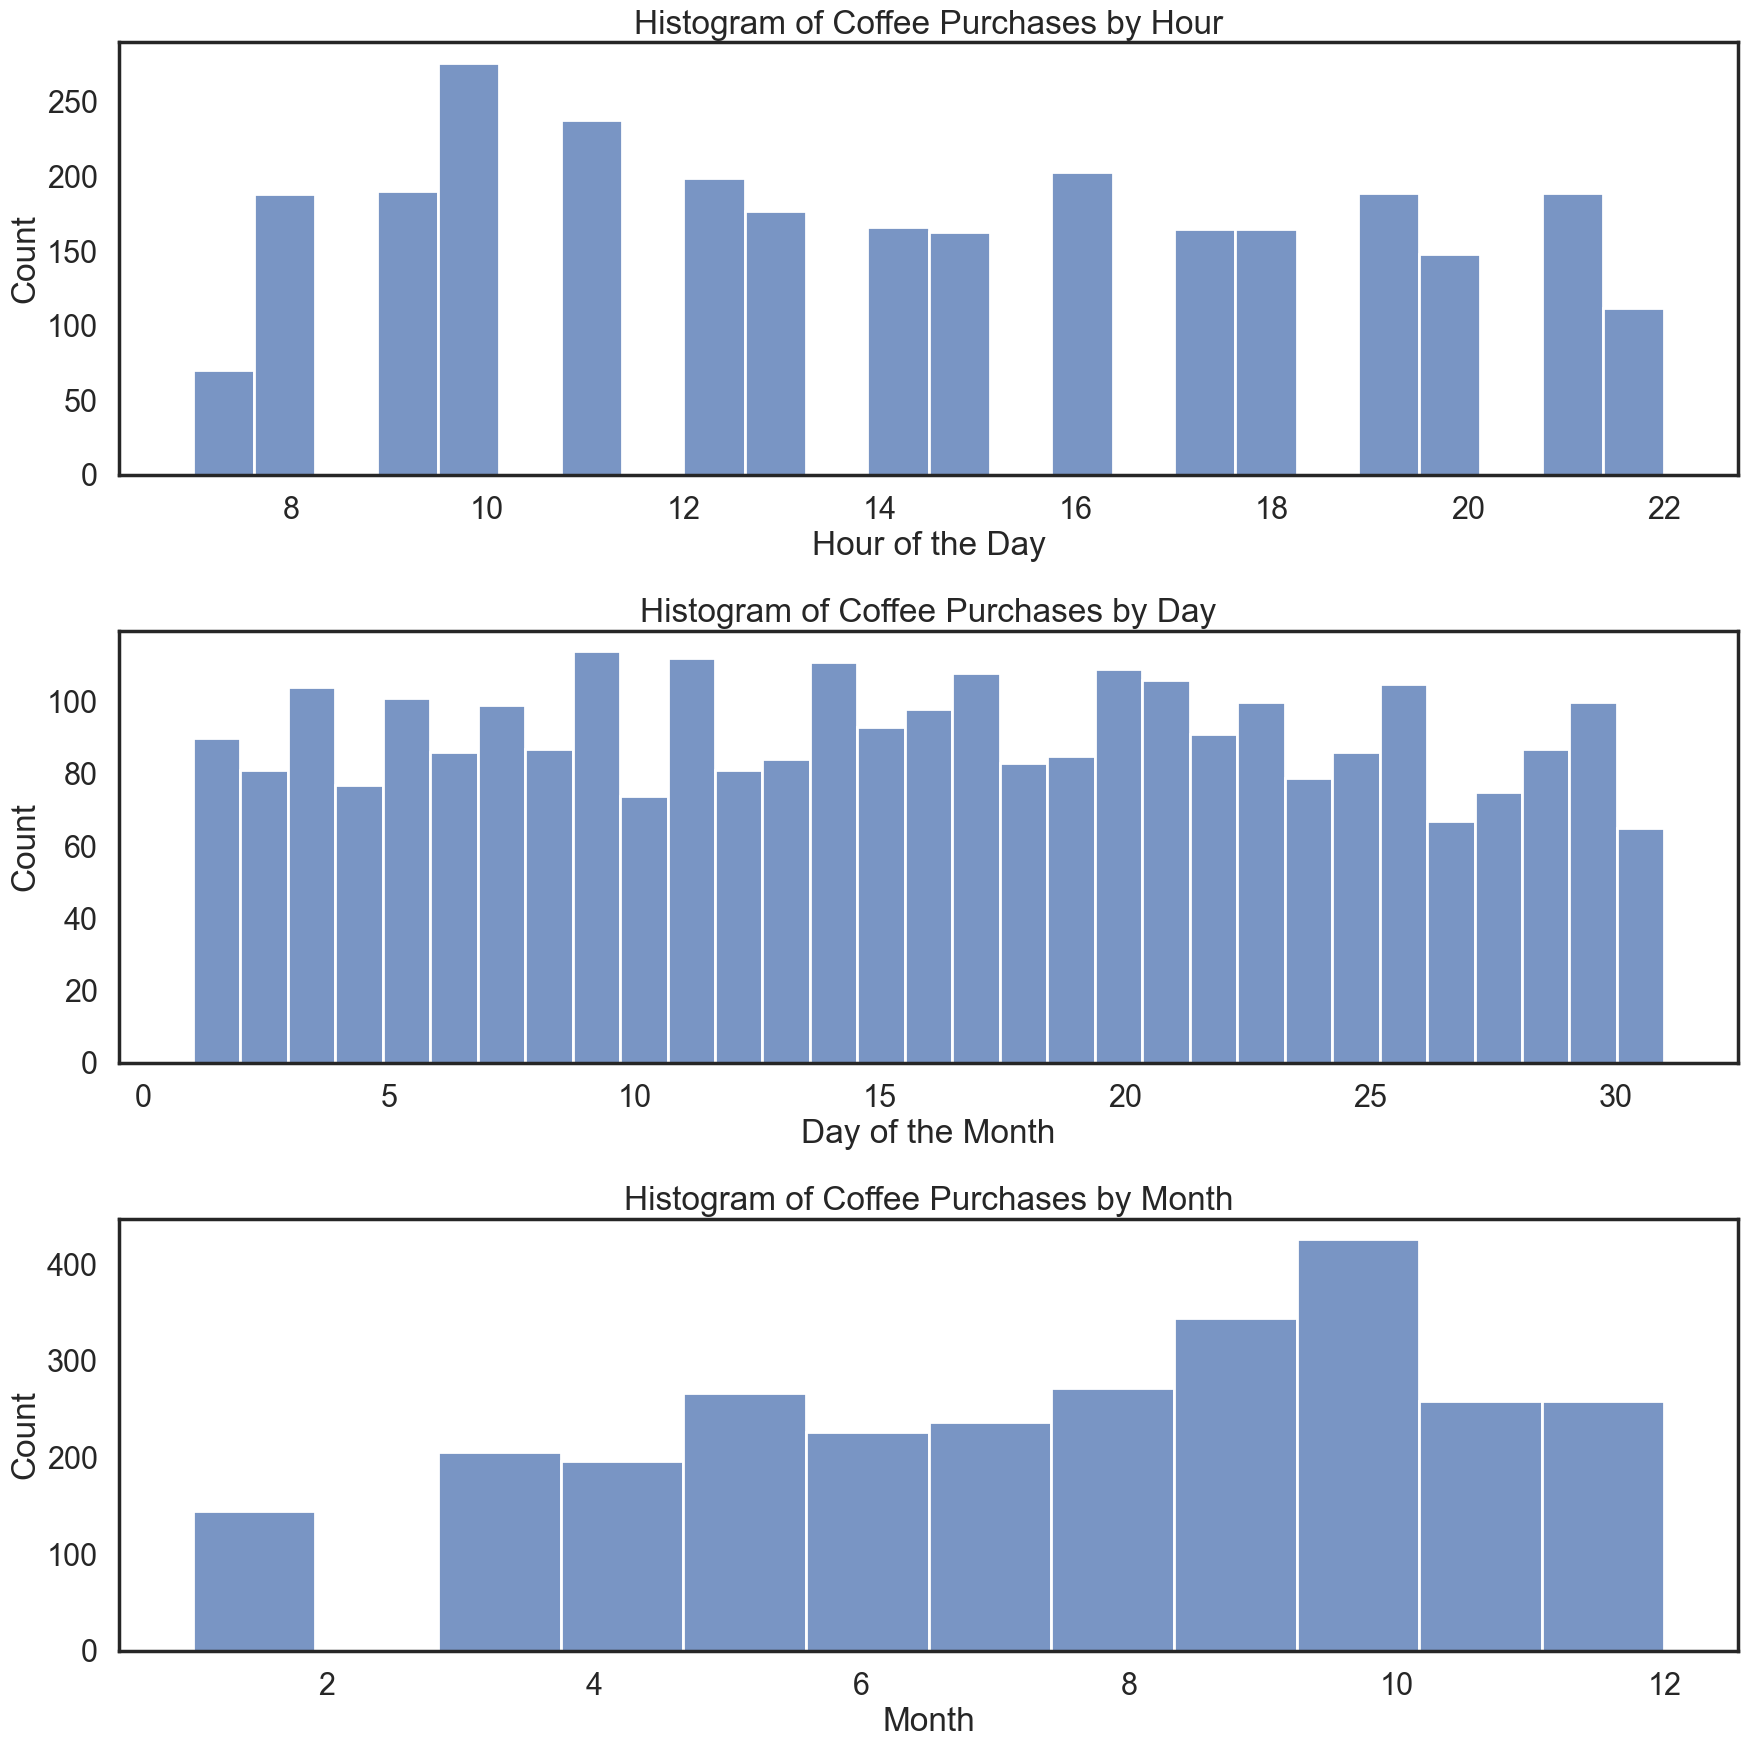

In [10]:
# Plot stacked histograms
plt.figure(figsize=(18, 18))

sns.set(style="white")
sns.set_context("poster")

# Hour
plt.subplot(3, 1, 1)
sns.histplot(data=df, x='hour', multiple='stack', bins=24, palette='viridis')
plt.title('Histogram of Coffee Purchases by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')

# Day
plt.subplot(3, 1, 2)
sns.histplot(data=df, x='day', multiple='stack', bins=31, palette='viridis')
plt.title('Histogram of Coffee Purchases by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Count')

# Month
plt.subplot(3, 1, 3)
sns.histplot(data=df, x='month', multiple='stack', bins=12, palette='viridis')
plt.title('Histogram of Coffee Purchases by Month')
plt.xlabel('Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

***Color number of coffee cups by the type of coffee sold during these timeframes***

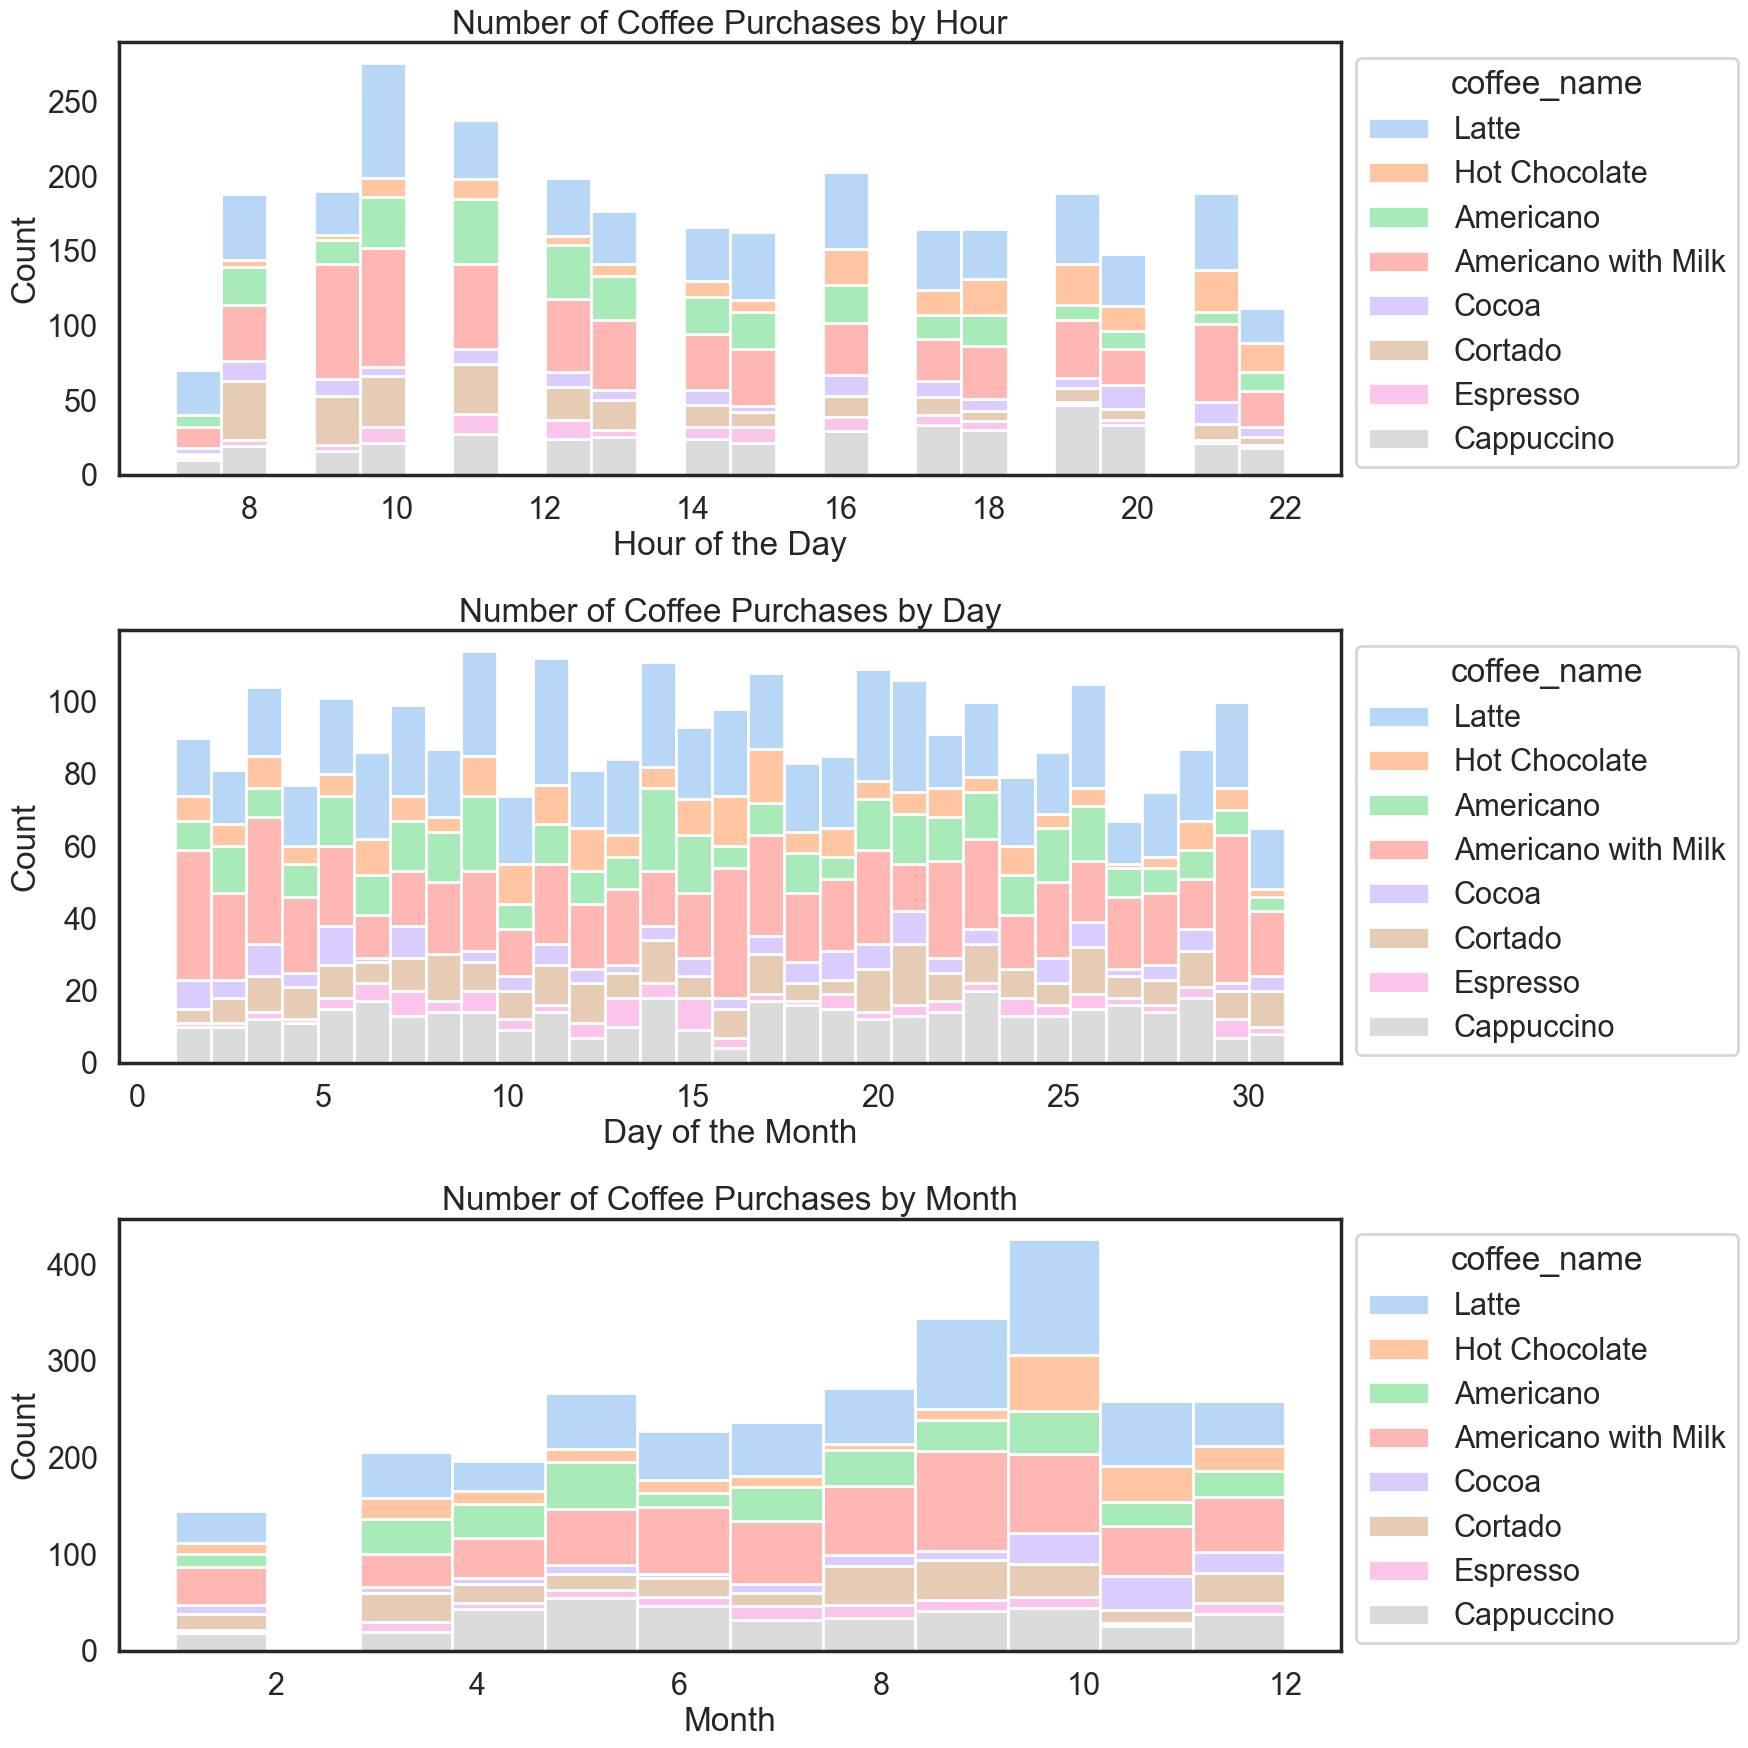

In [11]:
# Plot stacked histograms
plt.figure(figsize=(18, 18))

sns.set(style="white")
sns.set_context("poster")

# Hour
plt.subplot(3, 1, 1)
ax = sns.histplot(data=df, x='hour', multiple='stack', hue='coffee_name',bins=24, palette='pastel')
plt.title('Number of Coffee Purchases by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Day
plt.subplot(3, 1, 2)
ax = sns.histplot(data=df, x='day', multiple='stack', hue='coffee_name',bins=31, palette='pastel')
plt.title('Number of Coffee Purchases by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Month
plt.subplot(3, 1, 3)
ax = sns.histplot(data=df, x='month', multiple='stack', hue='coffee_name',bins=12, palette='pastel')
plt.title('Number of Coffee Purchases by Month')
plt.xlabel('Month')
plt.ylabel('Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

***The distrubtion of coffee cups per day per coffee type over the entire year to determine supply demand each season***

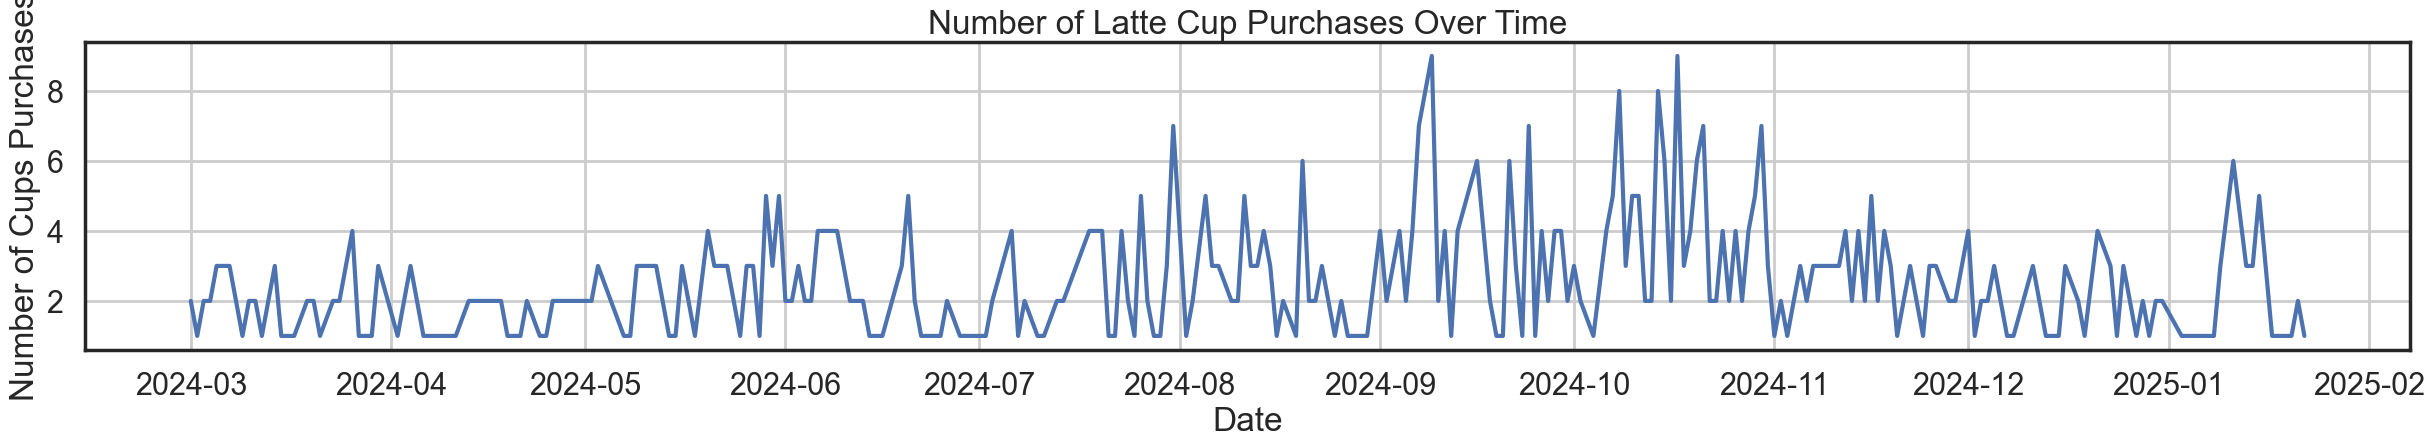

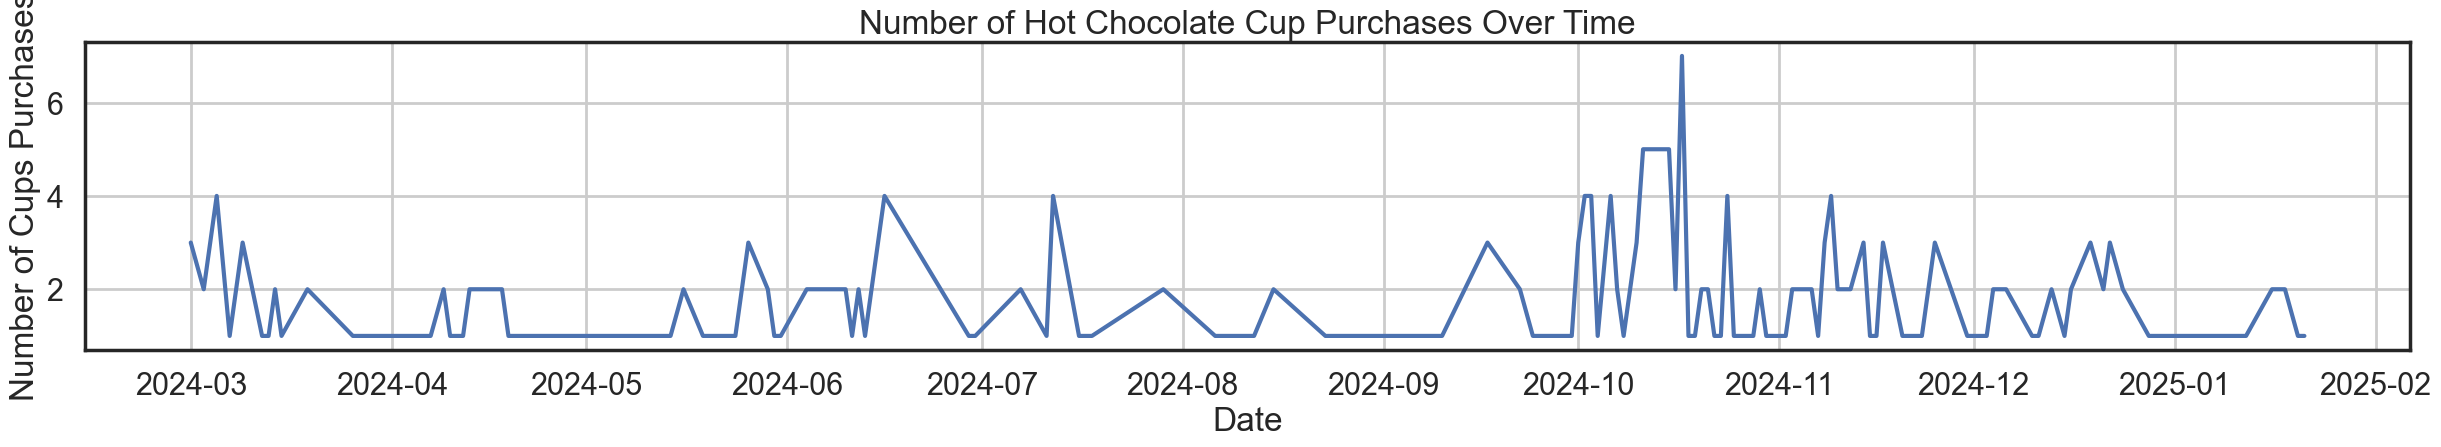

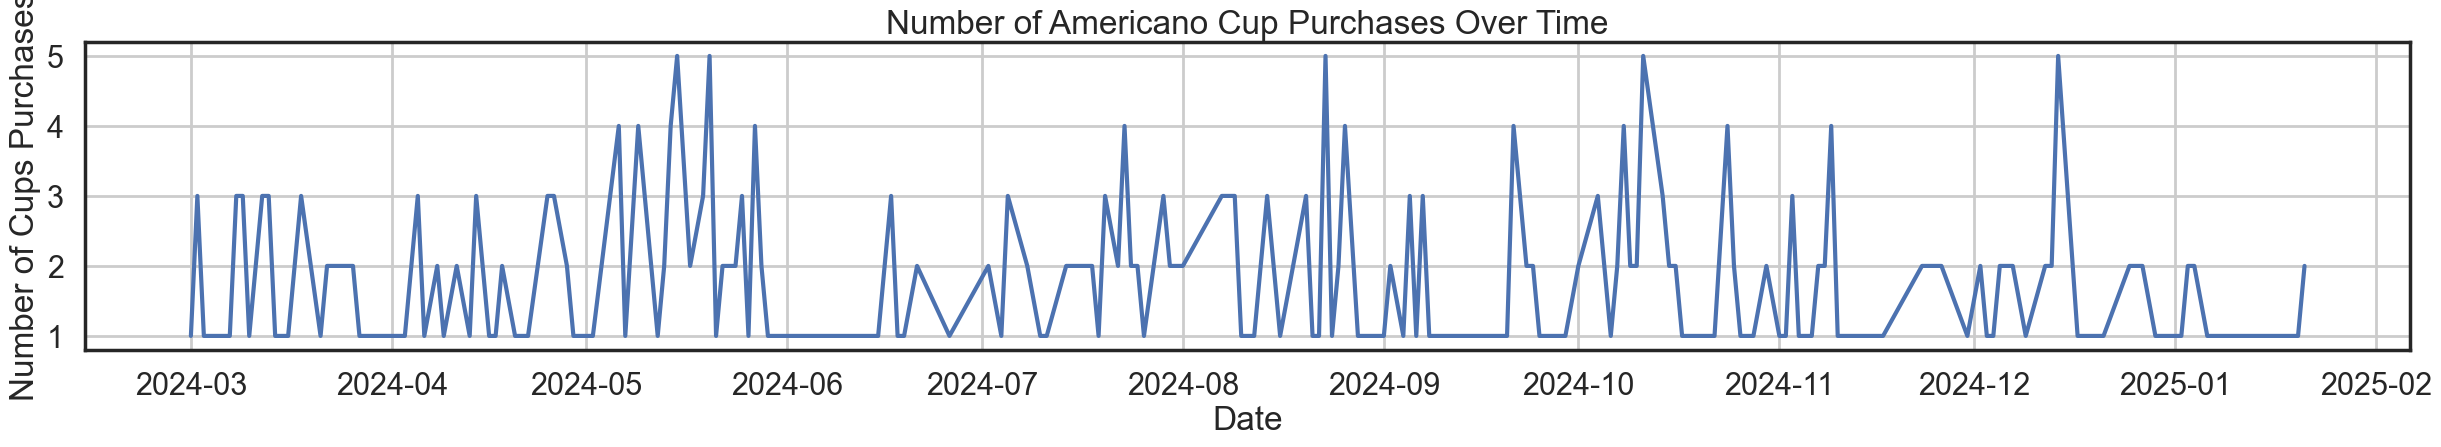

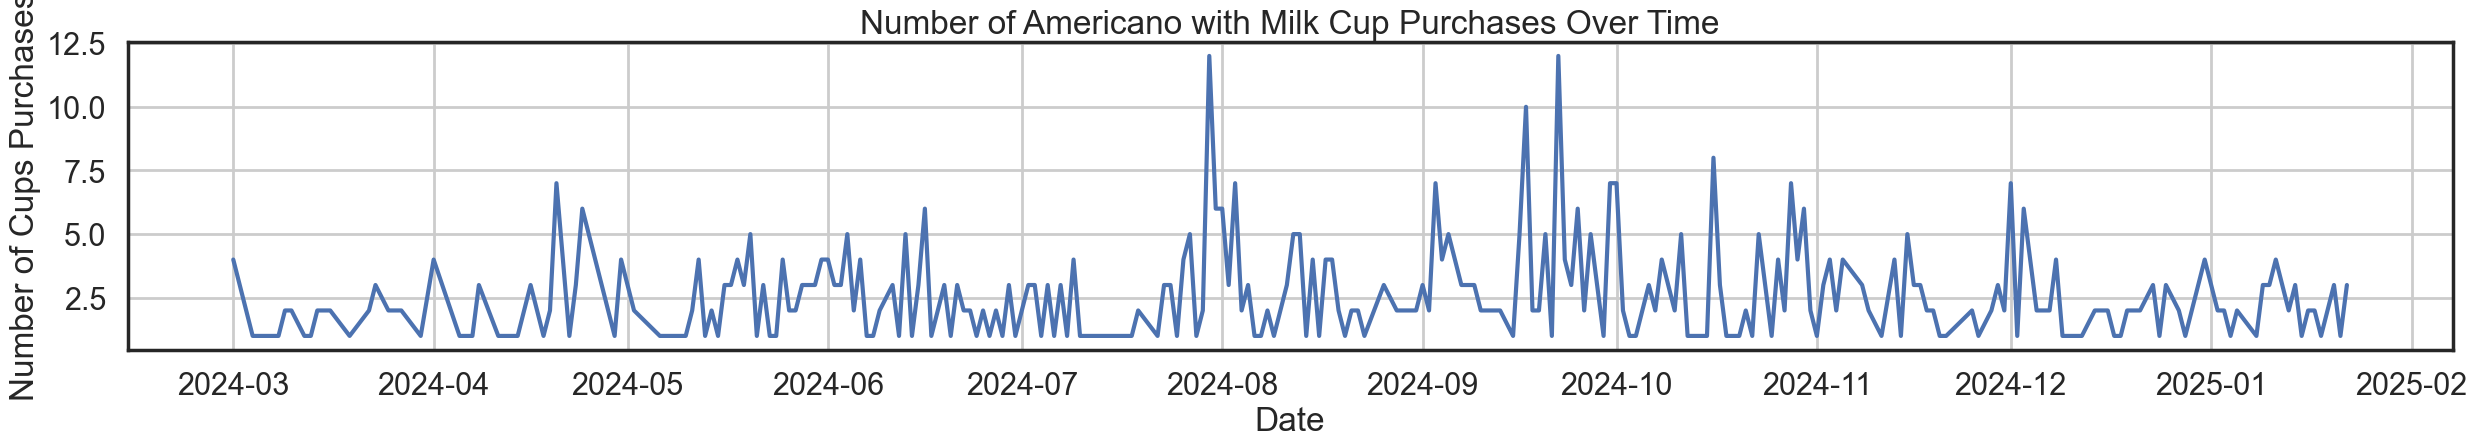

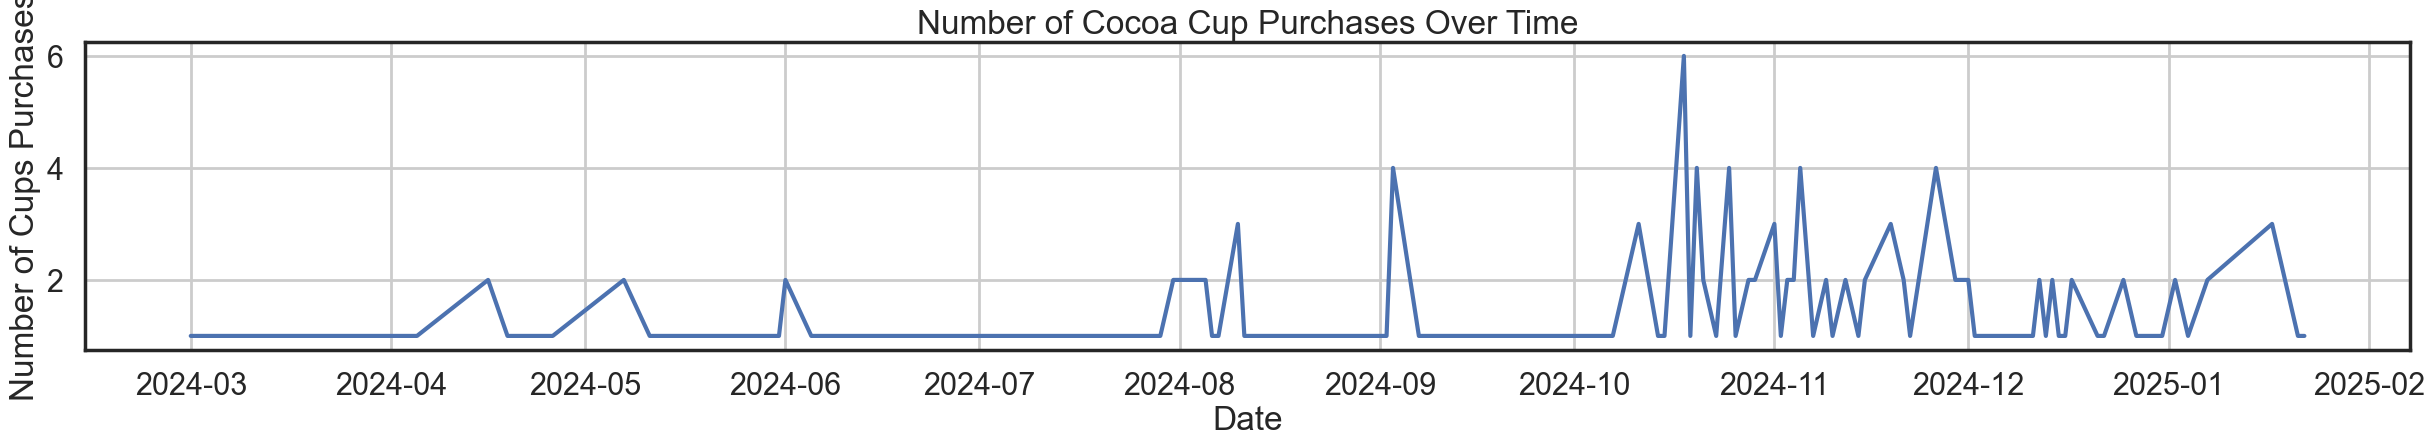

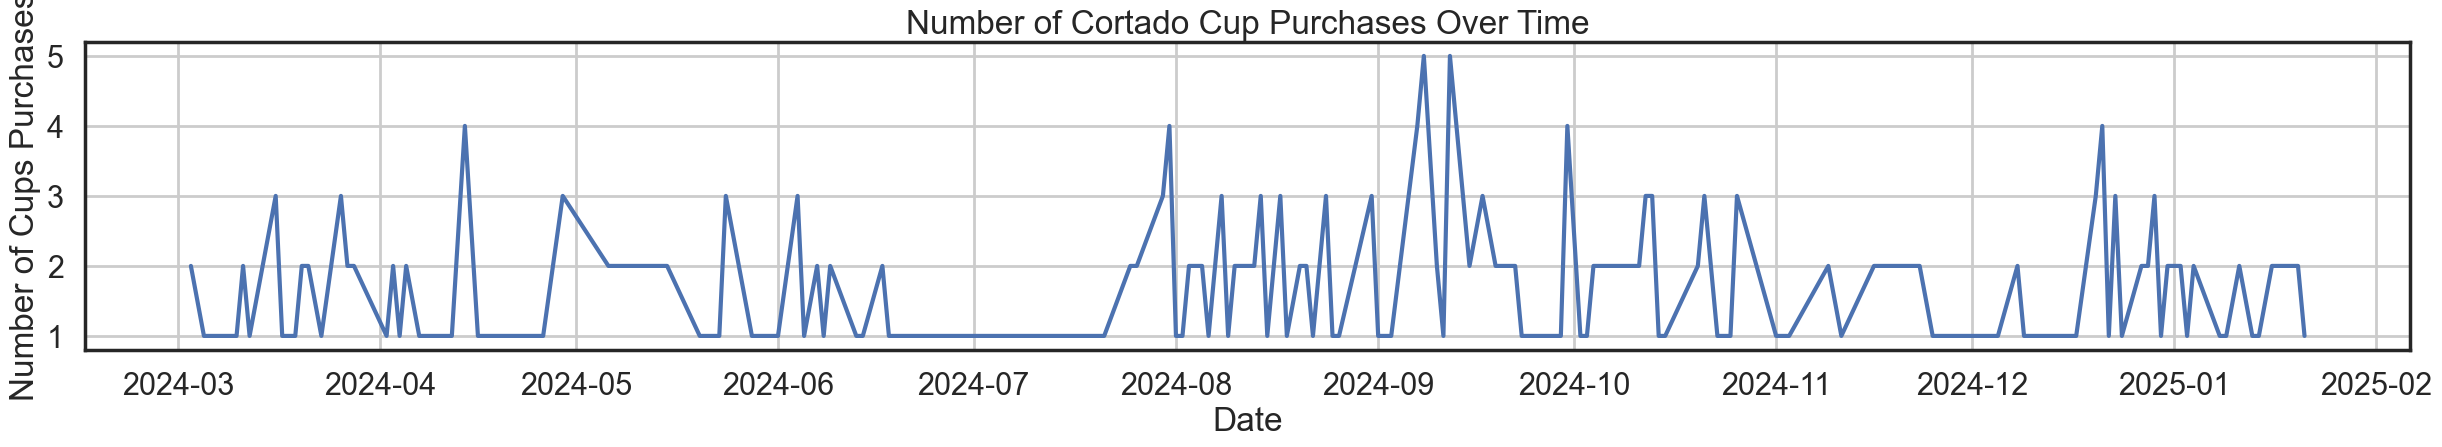

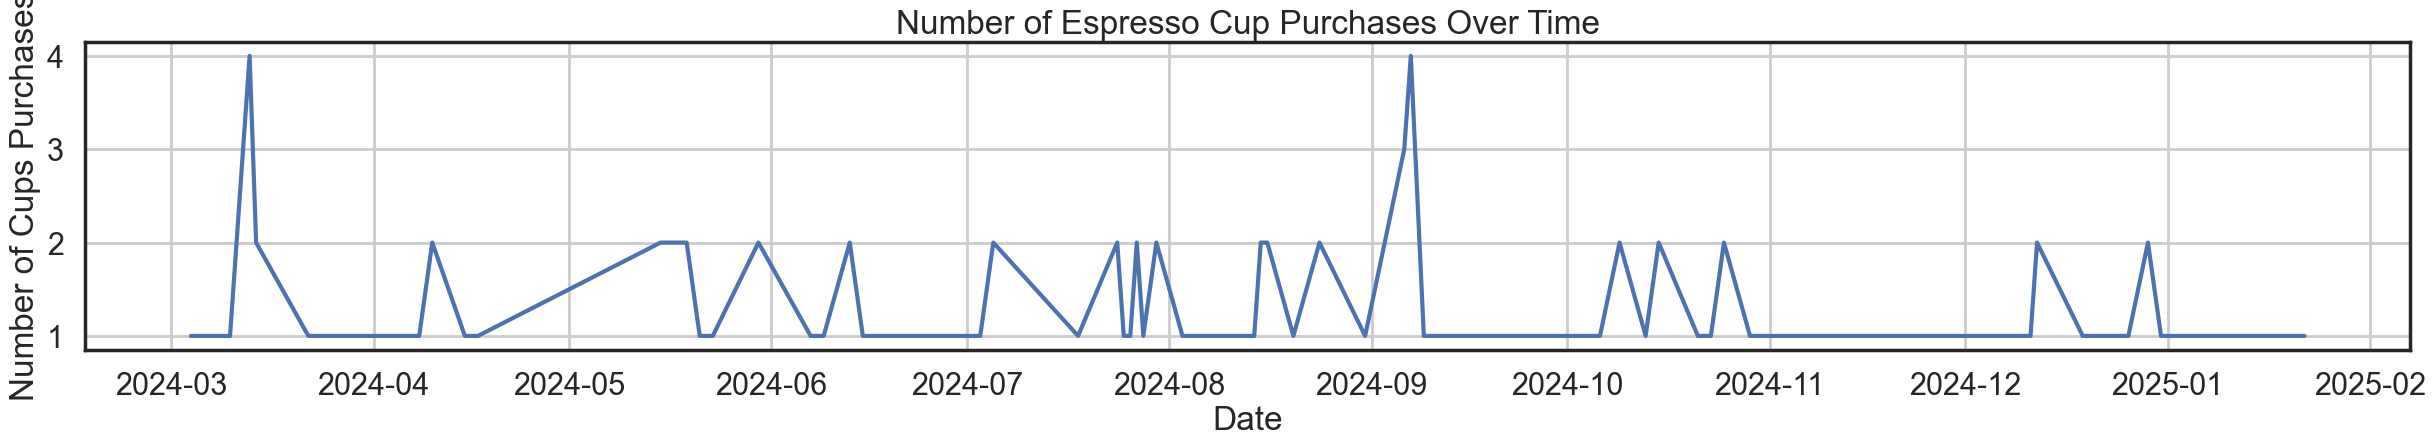

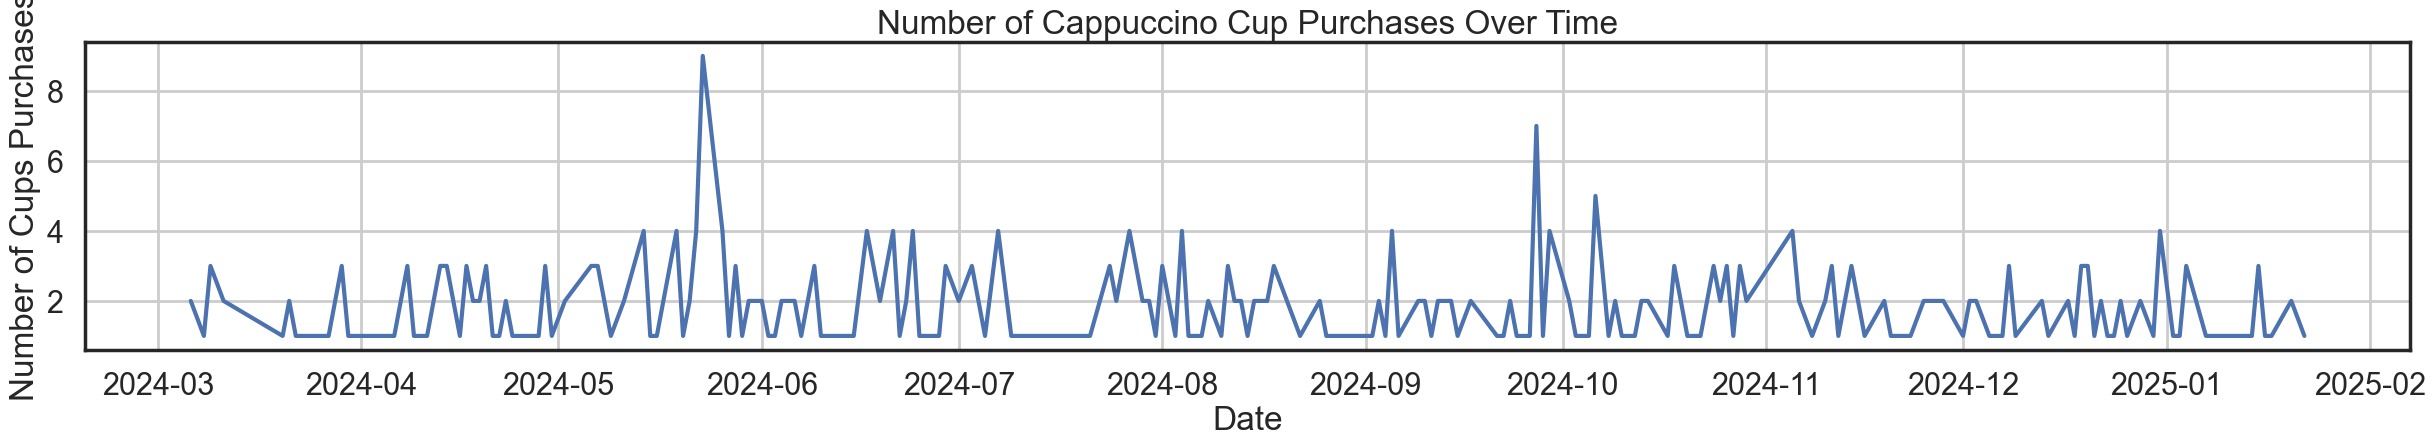

In [12]:
#View frequency of each coffee type through the year

for coffee_name in df['coffee_name'].unique():
    # Filter the dataset for the current coffee name
    coffee_df = df[df['coffee_name'] == coffee_name]
    
    # Calculate the number of cups per day
    coffee_counts = coffee_df['datetime'].dt.date.value_counts().sort_index()
    
    # Plot the results
    plt.figure(figsize=(30, 4))
    coffee_counts.plot(kind='line')
    plt.title(f'Number of {coffee_name} Cup Purchases Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Cups Purchases')
    plt.grid(True)
    plt.show()

***cumulative sales of each coffee type over the year***

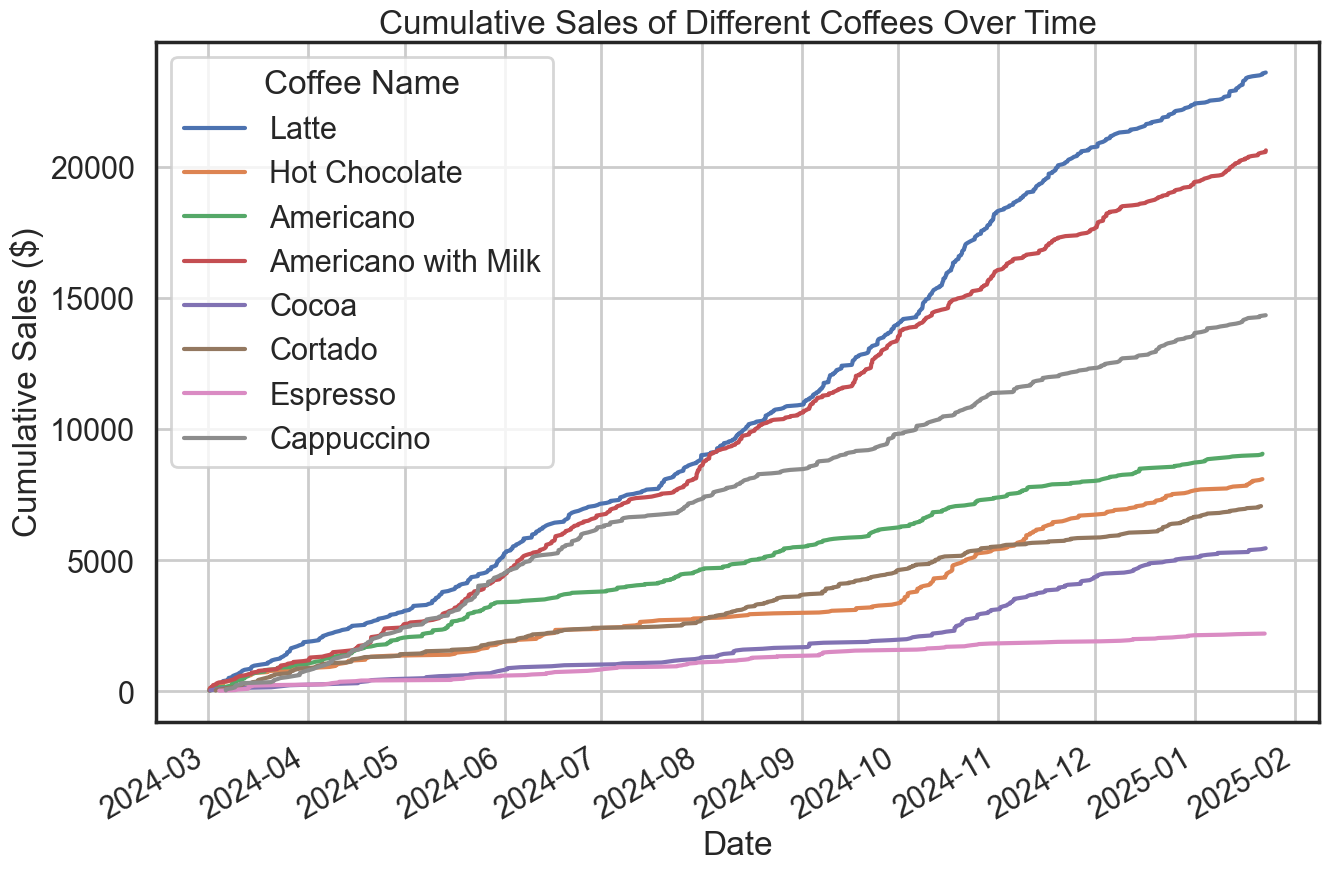

In [13]:
plt.figure(figsize=(15, 10))

for coffee_name in df['coffee_name'].unique():
    coffee_df = df[df['coffee_name'] == coffee_name]
    
    # Calculate the cumulative sum of the 'money' column
    coffee_df = coffee_df.set_index('datetime').sort_index()
    cumulative_sales = coffee_df['money'].cumsum()
    # Plot the cumulative sum of money versus datetime
    cumulative_sales.plot(kind='line', label=coffee_name)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Sales ($)')
plt.title('Cumulative Sales of Different Coffees Over Time')
plt.grid(True)
plt.legend(title='Coffee Name')

# Show the plot
plt.show()

**Identify total sales by coffee type**
- Americano with Milk had the highest sales.
- Espresso sold the least.

In [14]:
coffee_grouping_df = df.groupby('coffee_name')['money'].sum().reset_index()
coffee_grouping_df = coffee_grouping_df.sort_values(by='money', ascending=False)
# Apply styling for max and min
styled_df = coffee_grouping_df.style.format({
    'money': '${:,.2f}'  # Format as currency with 2 decimal places
}).highlight_max(subset=['money'], color='lightgreen').highlight_min(subset=['money'], color='lightcoral')

styled_df

,coffee_name,money
7,Latte,"$23,610.86"
1,Americano with Milk,"$20,640.12"
2,Cappuccino,"$14,350.86"
0,Americano,"$9,065.50"
6,Hot Chocolate,"$8,098.38"
4,Cortado,"$7,067.58"
3,Cocoa,"$5,459.76"
5,Espresso,"$2,203.54"



View percentage of sales across coffee options as a pie chart to understand distribution

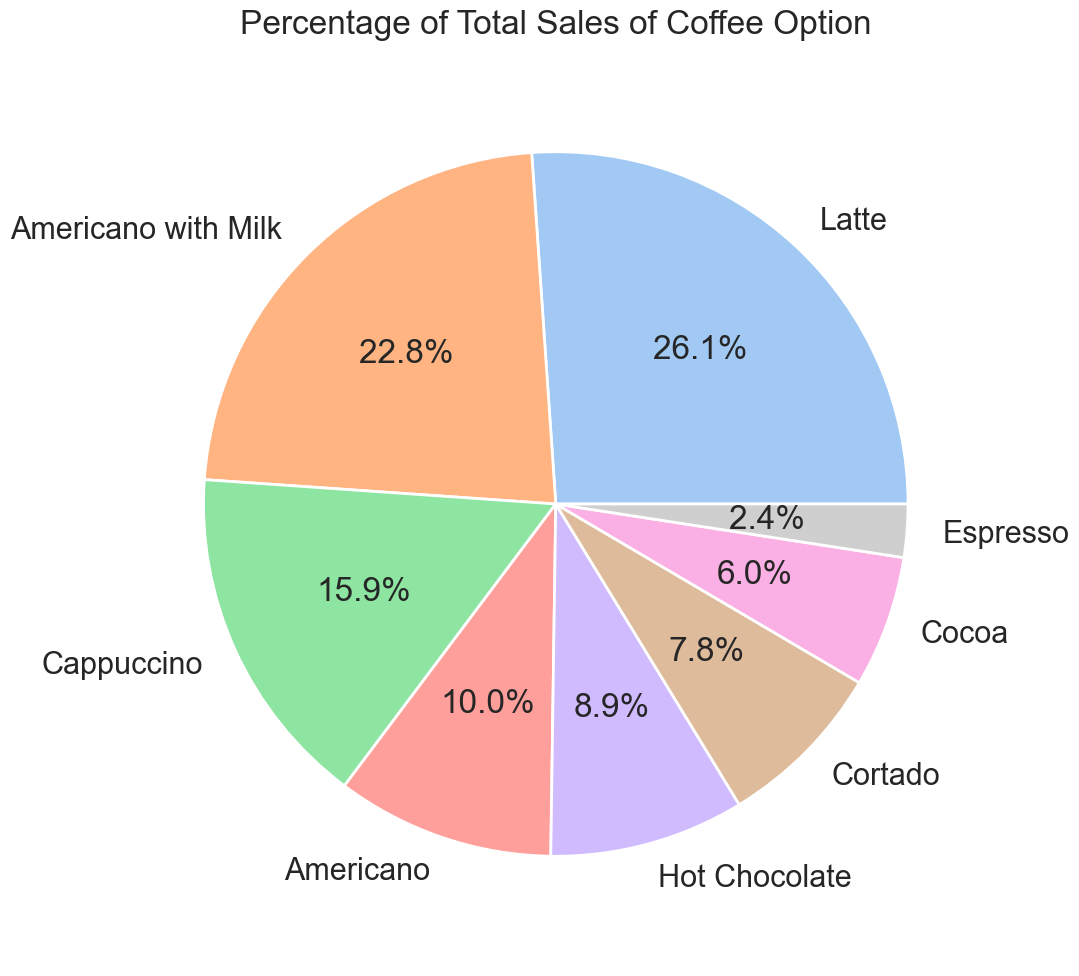

In [15]:
# Create pie chart
plt.figure(figsize=(10, 12))
plt.pie(coffee_grouping_df['money'], 
        labels=coffee_grouping_df['coffee_name'], 
        autopct='%1.1f%%', 
       colors=sns.color_palette('pastel'))
plt.title('Percentage of Total Sales of Coffee Option')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Plot total sales of each coffee type as bar chart

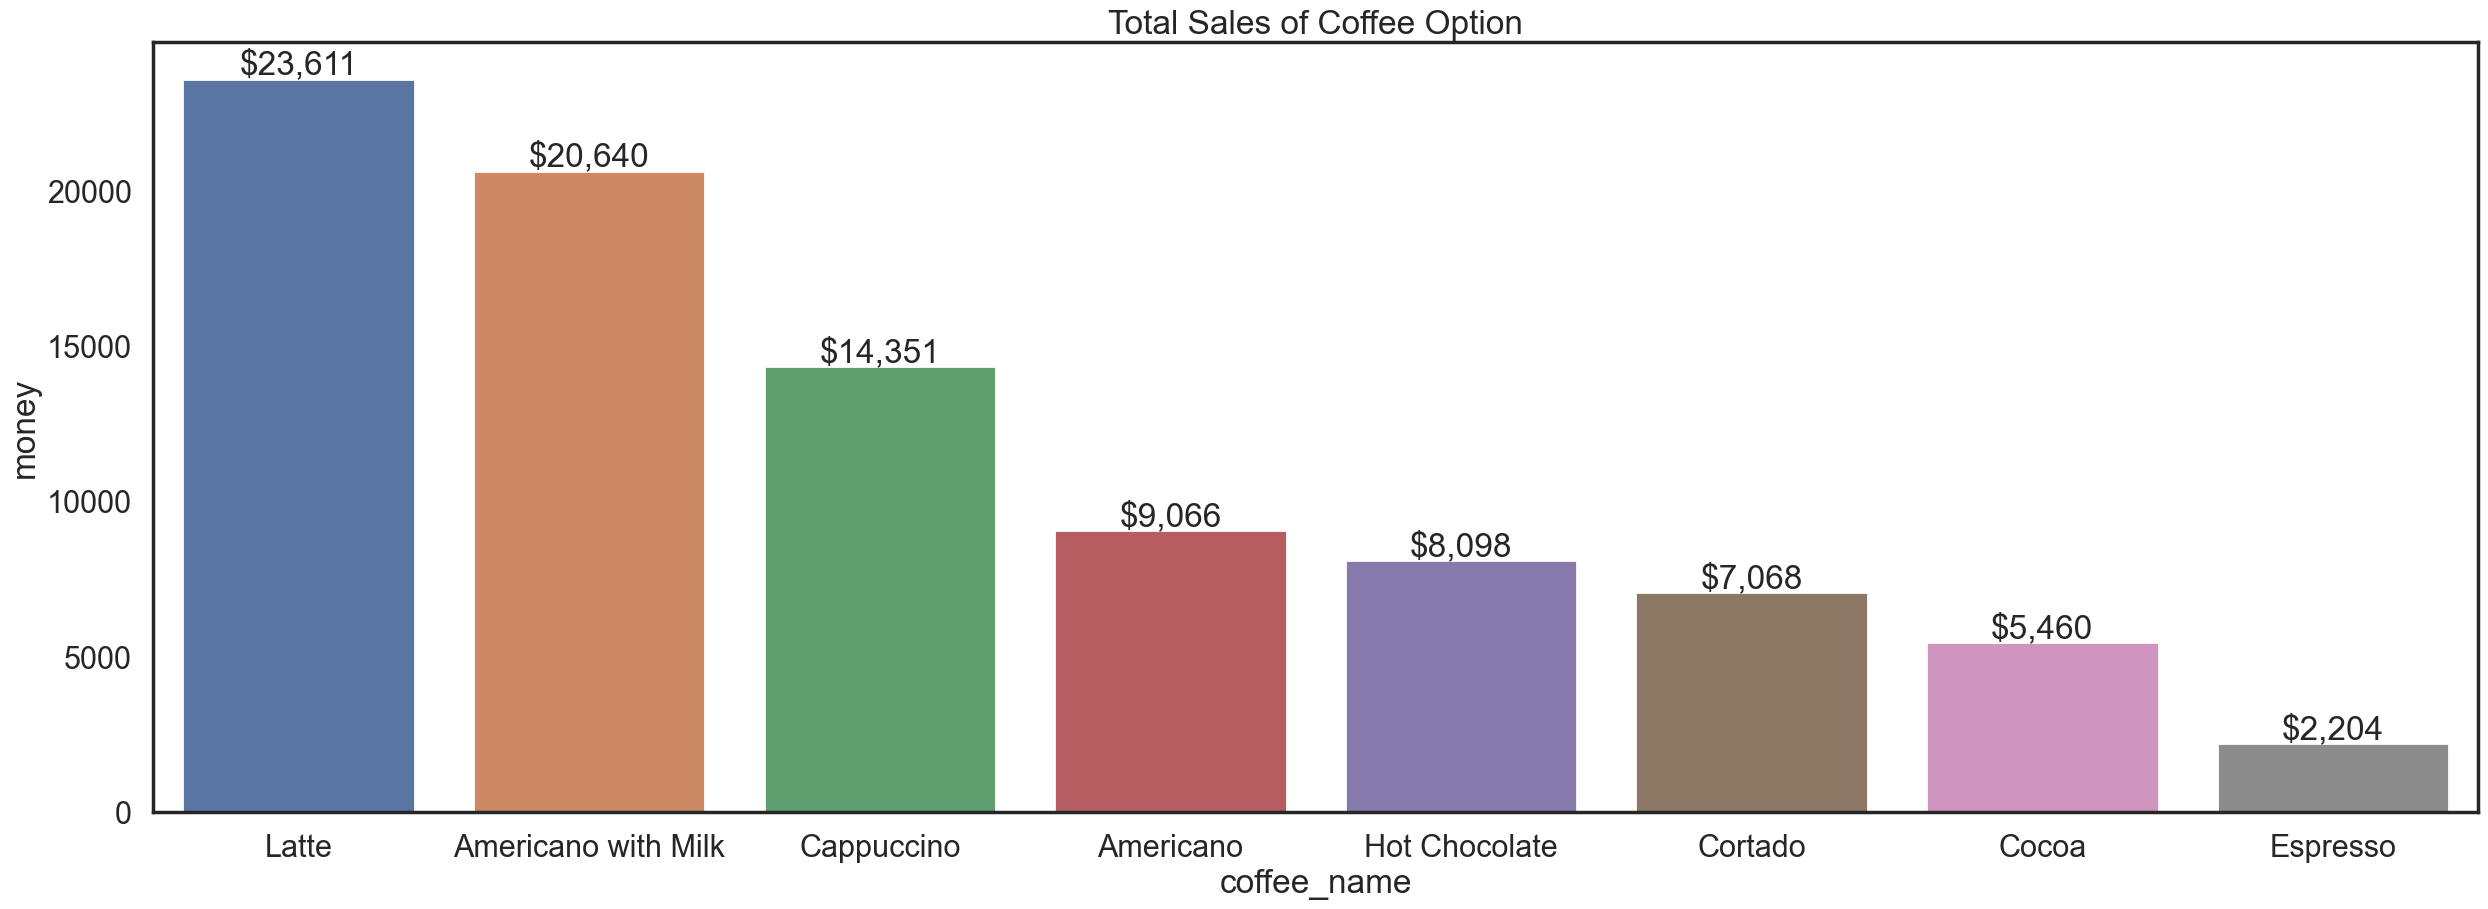

In [16]:
# Create bar chart
plt.figure(figsize=(30, 10))
ax = sns.barplot(data=coffee_grouping_df, 
        x='coffee_name',
        y='money')
plt.title('Total Sales of Coffee Option')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Latte and Americano with Milk are by far the most popular making up 49% of total 2024 sales.

Espesso and Cocoa are least popular making up only 8.3% of total 2024 sales. 

They can be options to be reviewed to be replaced in this vending coffee machine.

**coffee sales distribution with time**

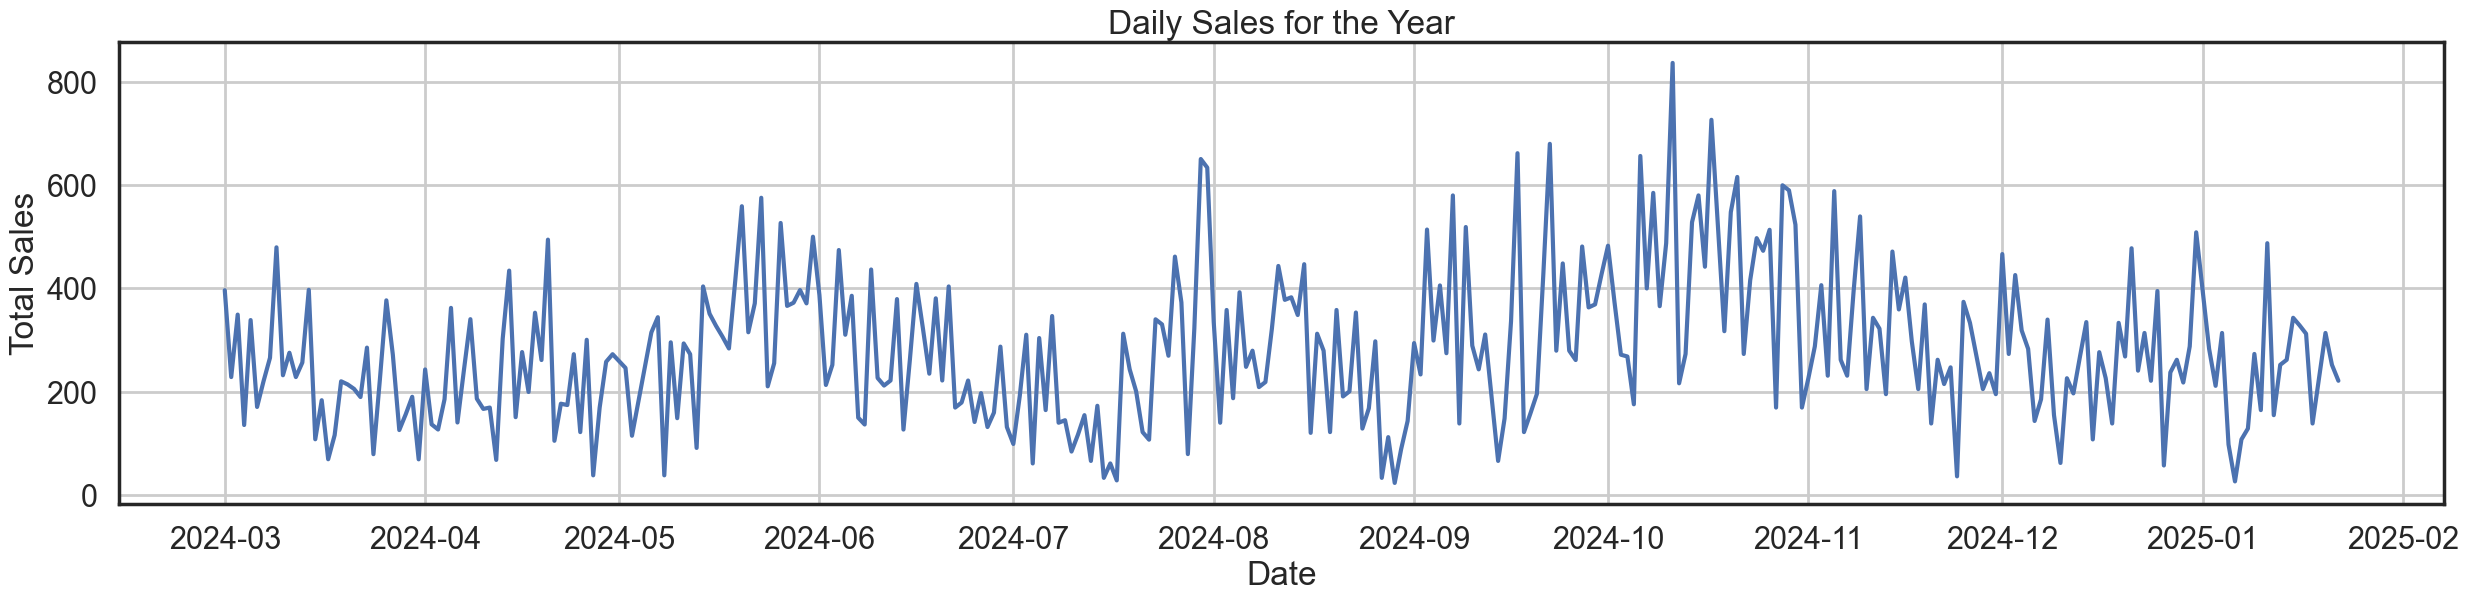

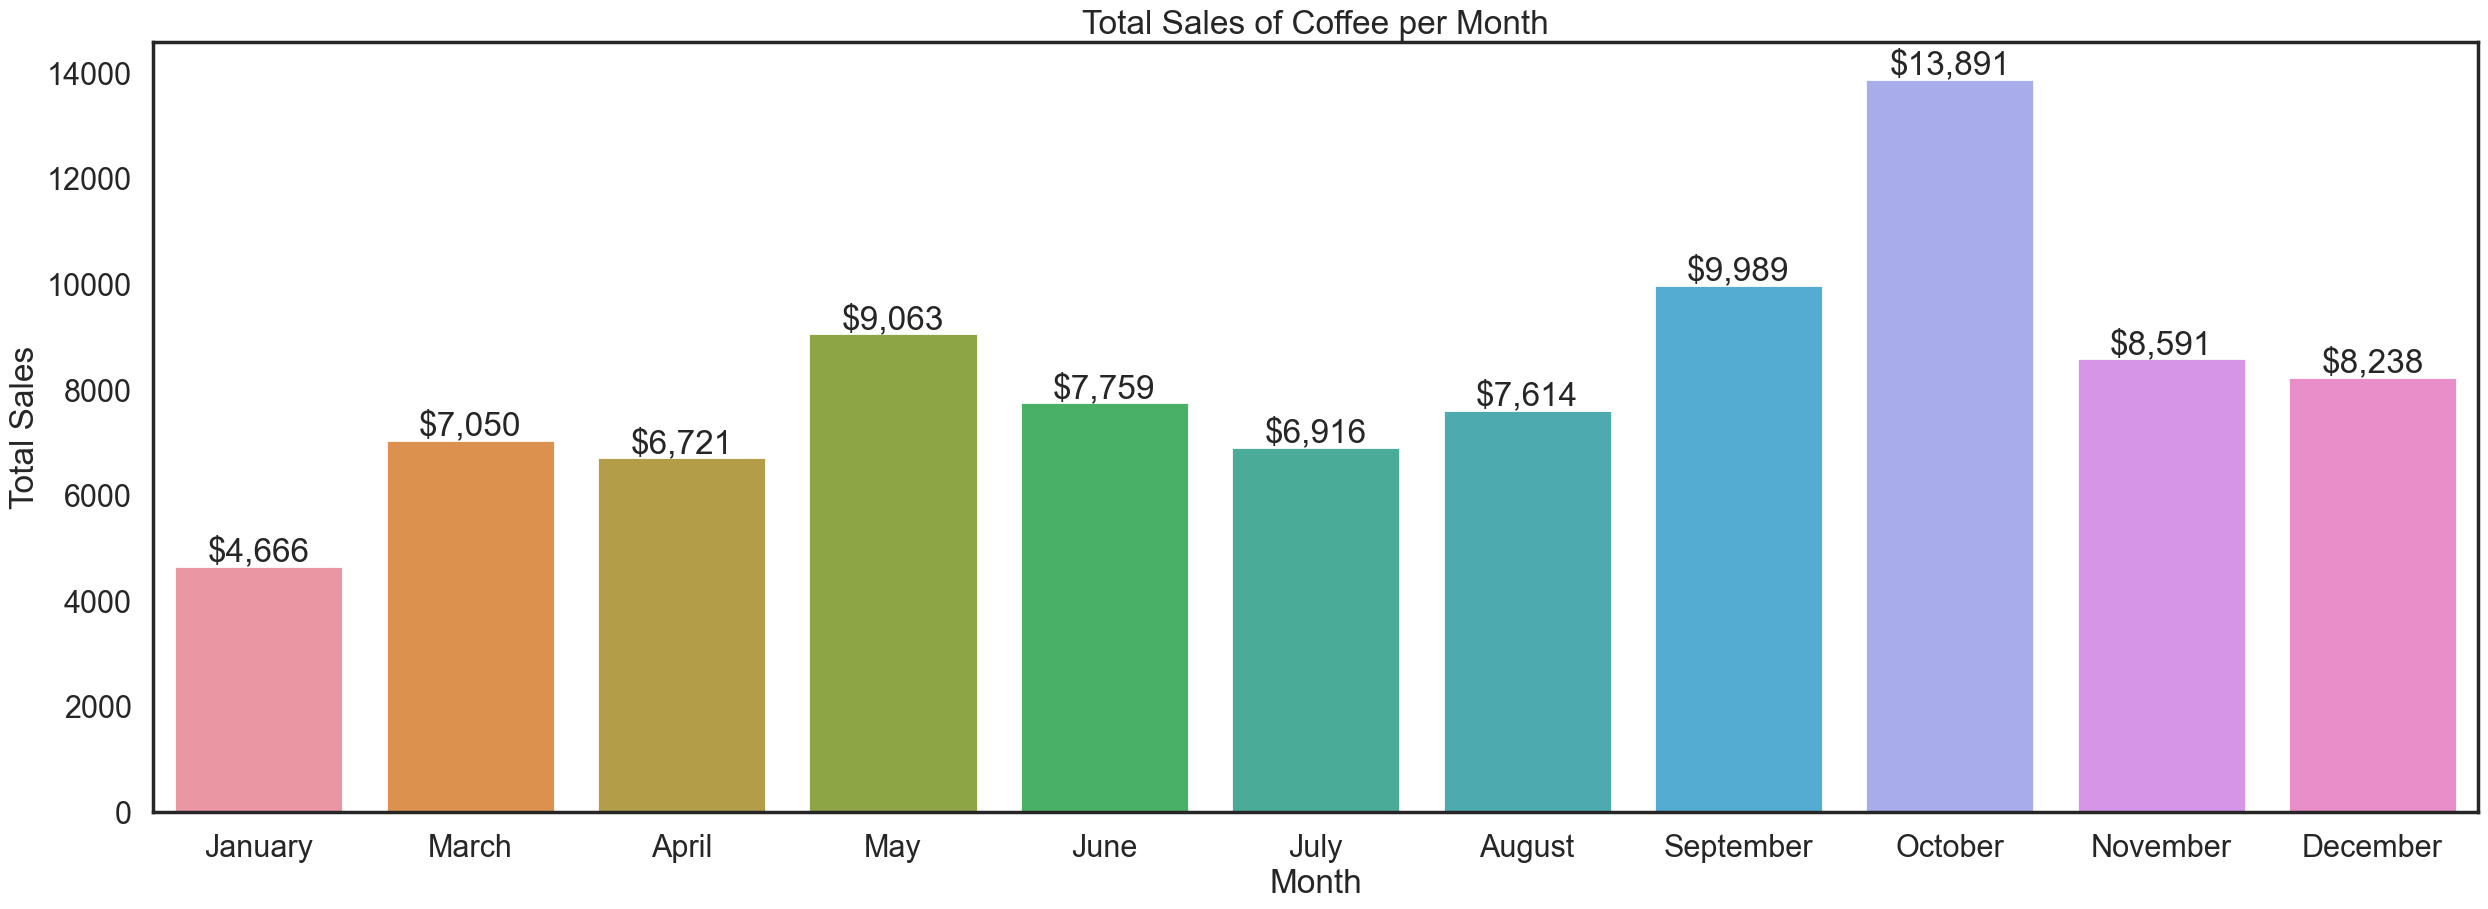

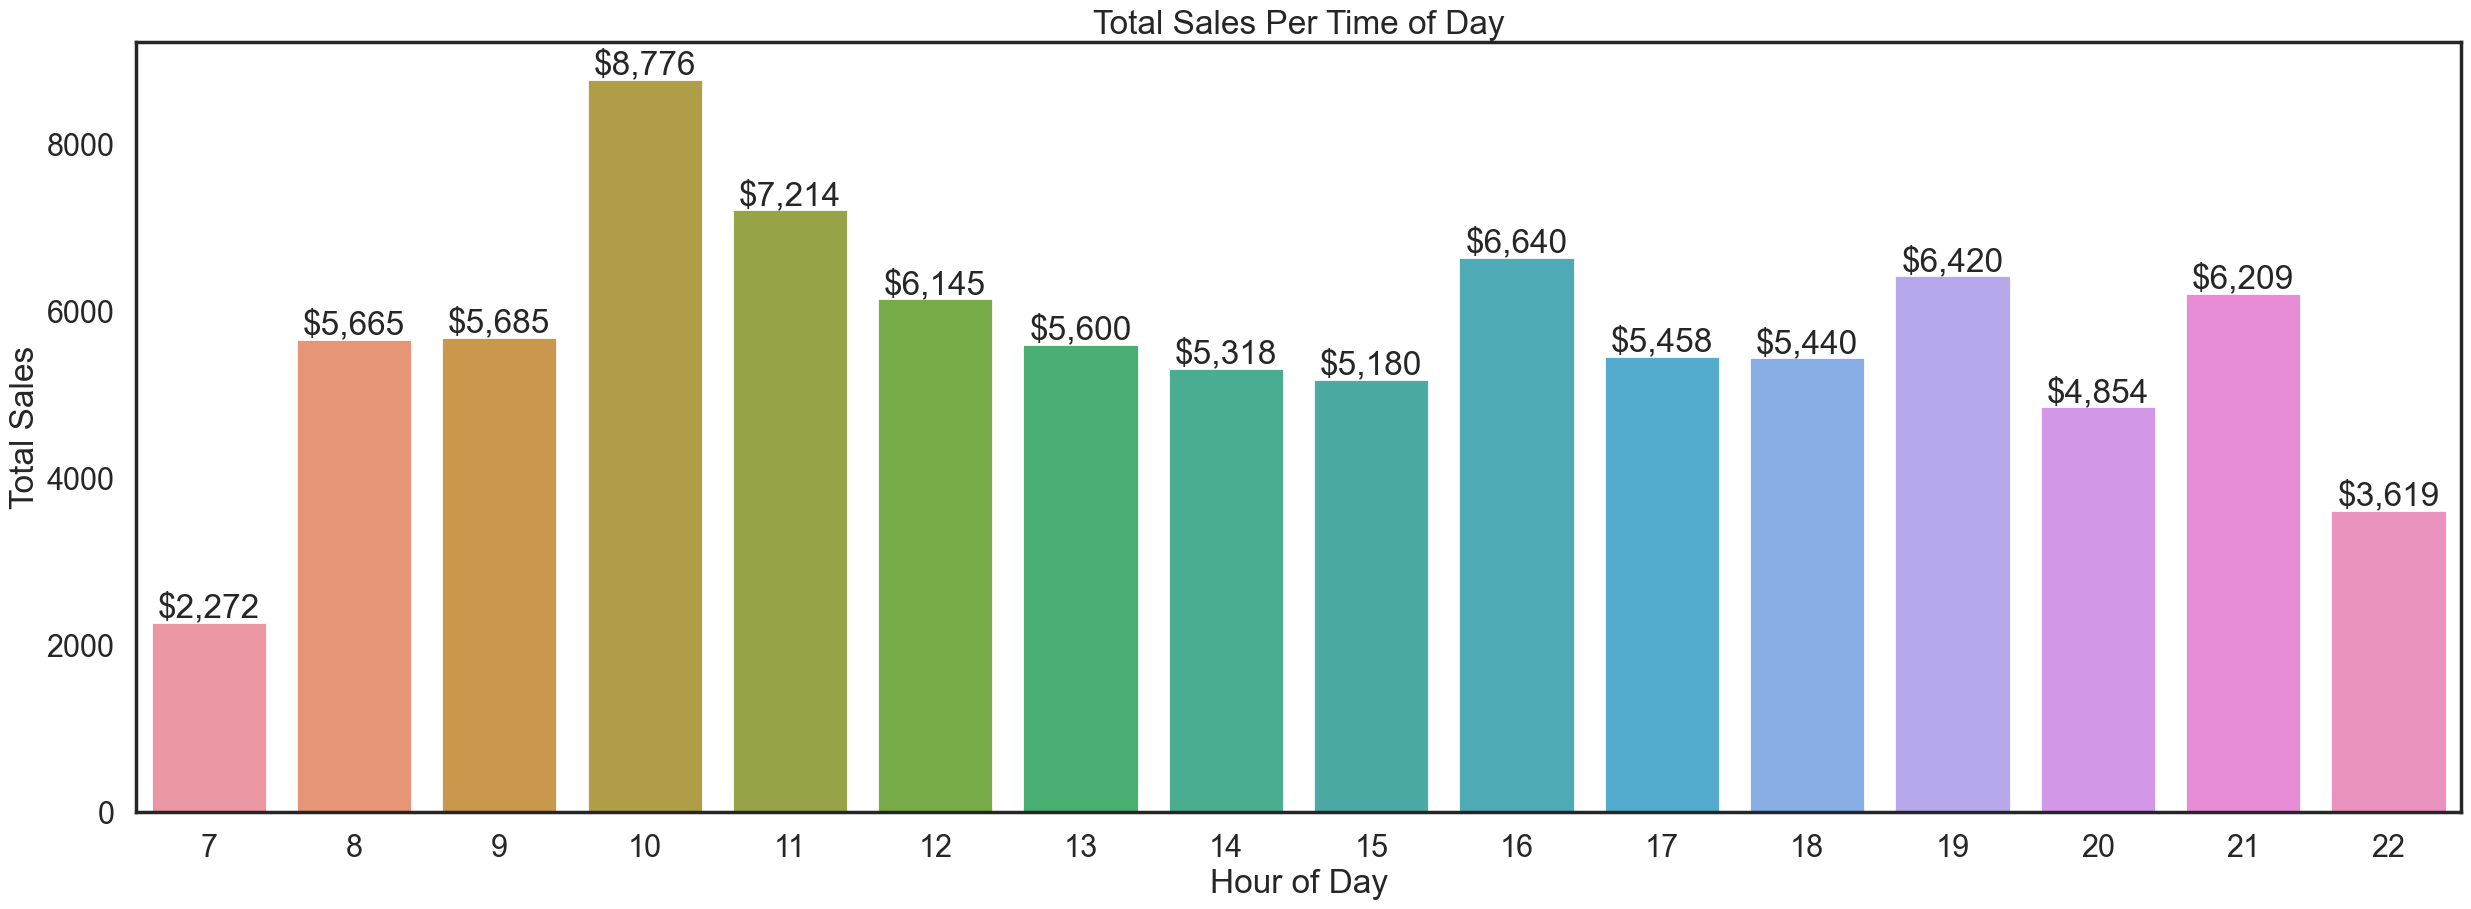

In [17]:
daily_sales = df.groupby(df['datetime'].dt.date)['money'].sum()
monthly_sales = df.groupby(df['datetime'].dt.month)['money'].sum().reset_index()
hourly_sales = df.groupby(df['datetime'].dt.hour)['money'].sum().reset_index()

# Map month numbers to month names
monthly_sales['datetime'] = monthly_sales['datetime'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 
                                               5: 'May', 6: 'June', 7: 'July', 8: 'August', 
                                               9: 'September', 10: 'October', 11: 'November', 12: 'December'})

#Plot timeseries, by month, by hour in a day
plt.figure(figsize=(30, 6))
daily_sales.plot(kind='line')
plt.title('Daily Sales for the Year')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

plt.figure(figsize=(30, 10))
ax = sns.barplot(data=monthly_sales, 
        x='datetime',
        y='money')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales of Coffee per Month')
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

plt.figure(figsize=(30, 10))
ax = sns.barplot(data=hourly_sales, 
        x='datetime',
        y='money')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.title('Total Sales Per Time of Day')
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

***Preferred Payment method***

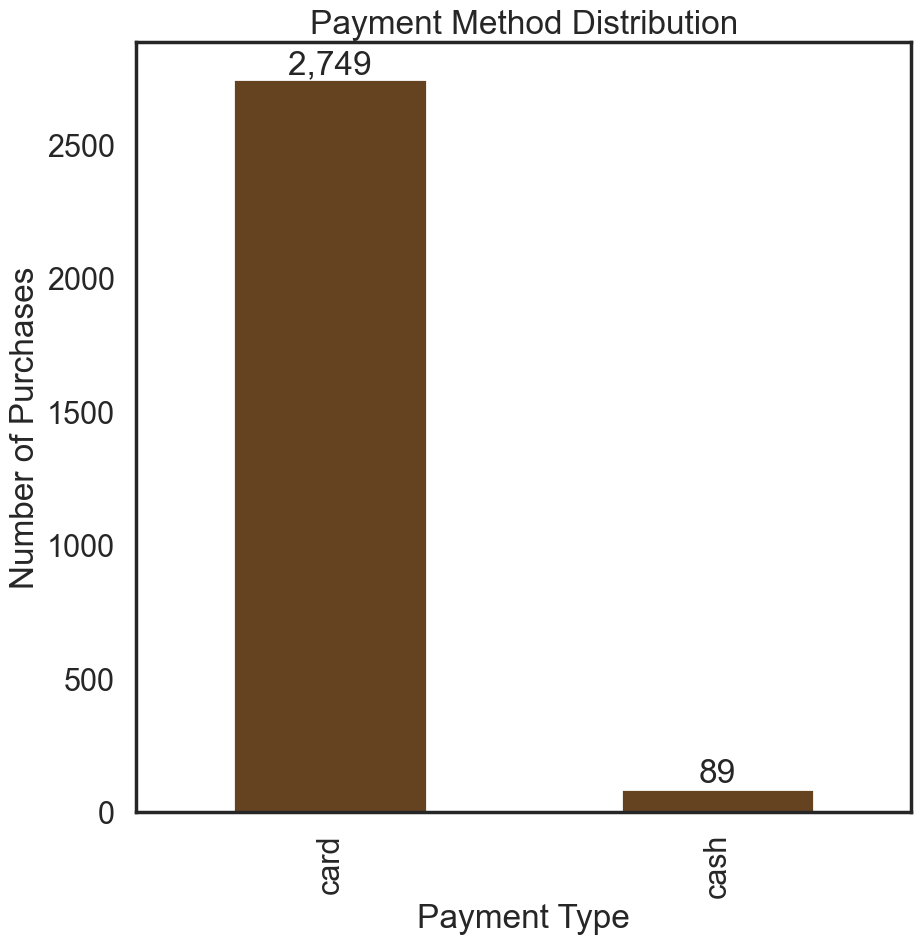

In [18]:
payment_type_df = df['cash_type'].value_counts()
plt.figure(figsize=(10, 10))
ax = payment_type_df.plot(kind='bar', color='#654321')
plt.xlabel('Payment Type')
plt.ylabel('Number of Purchases')
plt.title('Payment Method Distribution')

# Annotate the bars with the value counts
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()